In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

table = pd.read_csv("Data Store/1617table.csv")
table.head()

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts
0,1,Chelsea,38,30,3,5,85,33,52,93
1,2,Tottenham Hotspur,38,26,8,4,86,26,60,86
2,3,Manchester City,38,23,9,6,80,39,41,78
3,4,Liverpool,38,22,10,6,78,42,36,76
4,5,Arsenal,38,23,6,9,77,44,33,75


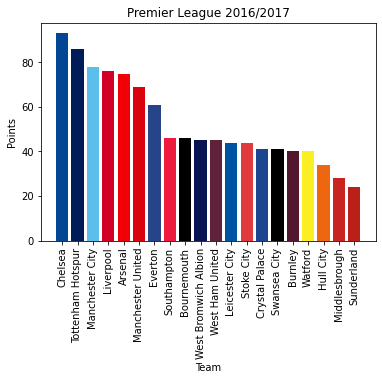

In [7]:
teamColours = ['#034694','#001C58','#5CBFEB','#D00027',
              '#EF0107','#DA020E','#274488','#ED1A3B',
               '#000000','#091453','#60223B','#0053A0',
               '#E03A3E','#1B458F','#000000','#53162f',
               '#FBEE23','#EF6610','#C92520','#BA1F1A']

plt.bar(x=table["Team"],height=table['Pts'], color = teamColours)
plt.xticks(rotation=90)
plt.title("Premier League 2016/2017")
plt.xlabel("Team")
plt.ylabel("Points")
plt.show()

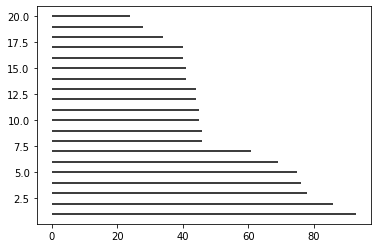

In [8]:
plt.hlines(y=np.arange(1,21),xmin=0, xmax=table['Pts'])

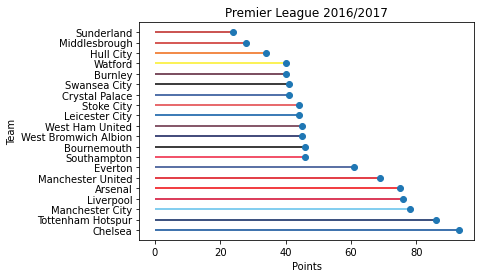

In [9]:
teamColours = ['#034694','#001C58','#5CBFEB','#D00027',
              '#EF0107','#DA020E','#274488','#ED1A3B',
               '#000000','#091453','#60223B','#0053A0',
               '#E03A3E','#1B458F','#000000','#53162f',
               '#FBEE23','#EF6610','#C92520','#BA1F1A']
plt.hlines(y=table['Team'],xmin=0, xmax=table['Pts'], color=teamColours)
plt.plot(table['Pts'], table['Team'], "o")

plt.title("Premier League 2016/2017")
plt.ylabel("Team")
plt.xlabel("Points")

plt.show()

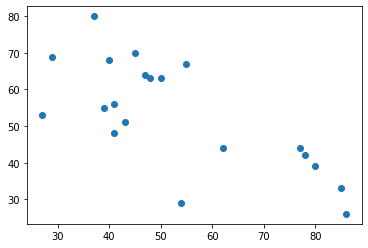

In [10]:
 plt.plot(table['GF'],table['GA'],"o")

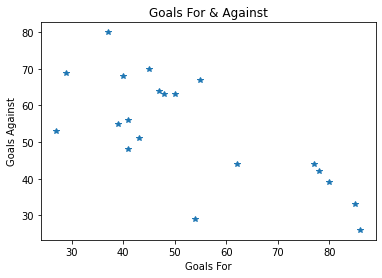

In [11]:
fig, ax = plt.subplots()

plt.plot(table['GF'],table['GA'],"*")

ax.set_title("Goals For & Against")
ax.set_xlabel("Goals For")
ax.set_ylabel("Goals Against")

plt.show()

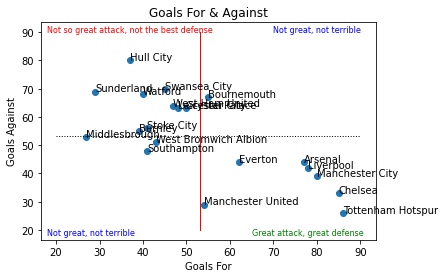

In [12]:
fig, ax = plt.subplots()

plt.plot(table['GF'],table['GA'],"*")
ax.scatter(table["GF"], table["GA"])

for i, txt in enumerate(table["Team"]):
    ax.annotate(txt, (table["GF"][i], table["GA"][i]))
plt.plot([table['GF'].mean(),table['GF'].mean()],[90,20],'r', linestyle = "-", lw=1)
plt.plot([20,90],[table['GA'].mean(),table['GA'].mean()],'k', linestyle = ":", lw=1)
ax.set_title("Goals For & Against")
ax.set_xlabel("Goals For")
ax.set_ylabel("Goals Against")
ax.text(18,90,"Not so great attack, not the best defense", color="red", size=8)
ax.text(65,18,"Great attack, great defense", color="green", size=8)
ax.text(18,18,"Not great, not terrible", color="b", size=8)
ax.text(70,90,"Not great, not terrible", color="b", size=8)

plt.show()

In [13]:
leagueWins = {'Team':['Manchester United','Blackburn Rovers','Arsenal',
                     'Chelsea','Manchester City','Leicester City'],
             'Championships':[13,1,3,4,2,1]}

df = pd.DataFrame(leagueWins, columns=['Team','Championships'])
df

,Team,Championships
0,Manchester United,13
1,Blackburn Rovers,1
2,Arsenal,3
3,Chelsea,4
4,Manchester City,2
5,Leicester City,1


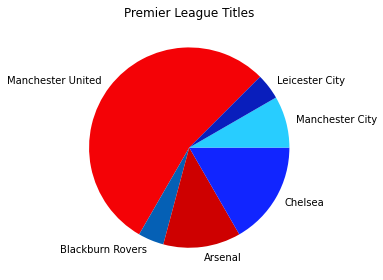

In [14]:
teamColours=['#f40206','#0560b5','#ce0000','#1125ff','#28cdff','#091ebc']

plt.pie(df['Championships'], labels=df["Team"], colors = teamColours, startangle=45)
plt.title("Premier League Titles")
plt.tight_layout()
#plt.show()

In [15]:
import squarify
import matplotlib

data = pd.read_csv("Data Store/ManCityATT.csv")
data.head()

,Player,Pos,GP,GS,MP,G,A,SOG,S,YC,RC
0,"Agüero, Sergio",F,19,17,1518,16,5,32,77,1,0
1,"Sterling, Raheem",M,22,18,1668,14,4,23,55,2,1
2,Gabriel Jesus,F,18,12,1016,8,2,22,35,3,0
3,"Sané, Leroy",M,22,17,1548,7,10,14,36,4,0
4,"De Bruyne, Kevin",M,24,24,2060,6,10,28,61,1,0


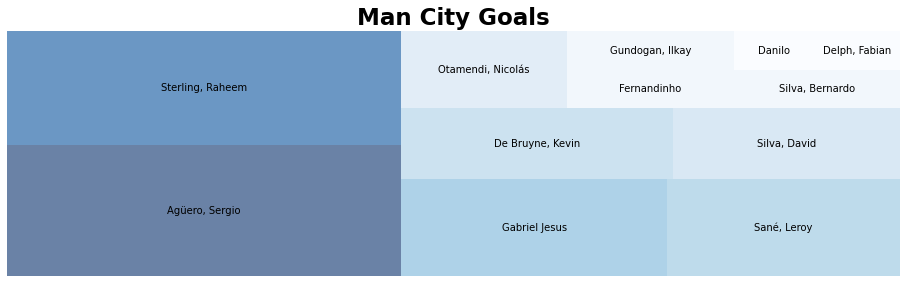

In [16]:
dataGoals = data[data["G"]>0]

norm = matplotlib.colors.Normalize(vmin=min(dataGoals.G), vmax=max(dataGoals.G))
colors = [matplotlib.cm.Blues(norm(value)) for value in dataGoals.G]

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)

squarify.plot(label=dataGoals.Player,sizes=dataGoals.G, color = colors, alpha=.6)
plt.title("Man City Goals",fontsize=23,fontweight="bold")

plt.axis('off')
plt.show()

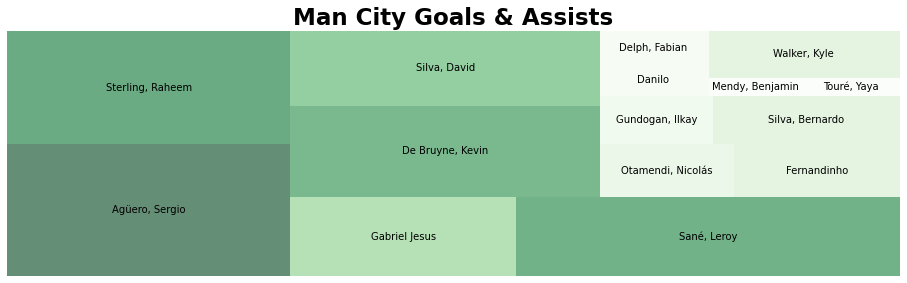

In [17]:
data["GA"] = data["G"] + data["A"]
dataGA = data[data["GA"]>0]

norm = matplotlib.colors.Normalize(vmin=min(dataGA.GA), vmax=max(dataGA.GA))
colors = [matplotlib.cm.Greens(norm(value)) for value in dataGA.GA]

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)

squarify.plot(label=dataGA.Player,sizes=dataGA.GA, color = colors, alpha=.6)
plt.title("Man City Goals & Assists",fontsize=23,fontweight="bold")

plt.axis('off')
plt.show()

In [19]:
df = pd.read_csv("Data Store/Results.csv")

df.head()


,Date,HomeTeam,AwayTeam,FTHG,FTAG,Referee
0,13/08/2016,Burnley,Swansea,0,1,J Moss
1,13/08/2016,Crystal Palace,West Brom,0,1,C Pawson
2,13/08/2016,Everton,Tottenham,1,1,M Atkinson
3,13/08/2016,Hull,Leicester,2,1,M Dean
4,13/08/2016,Man City,Sunderland,2,1,R Madley


In [20]:
Teams = df.HomeTeam.unique()
TeamsList = {Team : [0] for Team in Teams}
TeamsList

{'Burnley': [0],
 'Crystal Palace': [0],
 'Everton': [0],
 'Hull': [0],
 'Man City': [0],
 'Middlesbrough': [0],
 'Southampton': [0],
 'Arsenal': [0],
 'Bournemouth': [0],
 'Chelsea': [0],
 'Man United': [0],
 'Leicester': [0],
 'Stoke': [0],
 'Swansea': [0],
 'Tottenham': [0],
 'Watford': [0],
 'West Brom': [0],
 'Sunderland': [0],
 'West Ham': [0],
 'Liverpool': [0]}

In [21]:
for row in df.itertuples():
    Home = row[2]
    Away = row[3]

    if row.FTHG > row.FTAG:
        TeamsList[Home].append(TeamsList[Home][-1]+3)
        TeamsList[Away].append(TeamsList[Away][-1])
    elif row.FTHG == row.FTAG:
        TeamsList[Home].append(TeamsList[Home][-1]+1)
        TeamsList[Away].append(TeamsList[Away][-1]+1)
    else:
        TeamsList[Home].append(TeamsList[Home][-1])
        TeamsList[Away].append(TeamsList[Away][-1]+3)

print(TeamsList["Arsenal"])

[0, 0, 1, 4, 7, 10, 13, 16, 19, 20, 23, 24, 25, 28, 31, 34, 34, 34, 37, 40, 41, 44, 47, 47, 47, 50, 50, 50, 51, 54, 54, 57, 60, 60, 63, 66, 69, 72, 75]


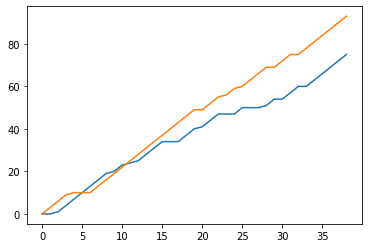

In [22]:
Matchday = list(range(0,39))

plt.plot(Matchday, TeamsList["Arsenal"])
plt.plot(Matchday, TeamsList["Chelsea"])

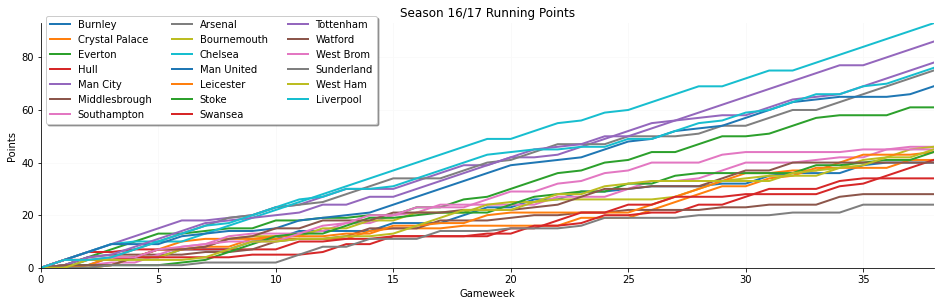

In [23]:
fig, ax = plt.subplots()

#Add our data as before, but setting colours and widths of lines
for team in TeamsList:
    plt.plot(Matchday, TeamsList[team], linewidth=2)

#Give the axes and plot a title each
plt.xlabel('Gameweek')
plt.ylabel('Points')
plt.title('Season 16/17 Running Points')
fig.set_size_inches(16, 4.5)

#Add a faint grey grid
plt.grid()
ax.xaxis.grid(color = "#F8F8F8")
ax.yaxis.grid(color = "#F9F9F9")

#Remove the margins between our lines and the axes
plt.margins(x=0,y=0)
ax.legend(TeamsList, loc="upper left", bbox_to_anchor=(0.0, 1.05),
          ncol=3, fancybox=True, shadow=True)

#Remove the spines of the chart on the top and right sides
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)